# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [123]:
pip install citipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
import requests
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy




### Generate the Cities List by Using the `citipy` Library

In [125]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [126]:
# Validate what cities are fetched

for city_info in city_data:
    print(city_info)

{'City': 'port mathurin', 'Lat': -19.6833, 'Lng': 63.4167, 'Max Temp': 74.73200000000001, 'Humidity': 85, 'Cloudiness': 80, 'Wind Speed': 6.82, 'Country': 'MU', 'Date': 1729999721}
{'City': 'colonia', 'Lat': 50.9333, 'Lng': 6.95, 'Max Temp': 54.95, 'Humidity': 88, 'Cloudiness': 0, 'Wind Speed': 3.09, 'Country': 'DE', 'Date': 1729999723}
{'City': 'bethel', 'Lat': 41.3712, 'Lng': -73.414, 'Max Temp': 45.932000000000016, 'Humidity': 59, 'Cloudiness': 0, 'Wind Speed': 0, 'Country': 'US', 'Date': 1729999724}
{'City': 'port-aux-francais', 'Lat': -49.35, 'Lng': 70.2167, 'Max Temp': 34.66400000000003, 'Humidity': 68, 'Cloudiness': 88, 'Wind Speed': 12.78, 'Country': 'TF', 'Date': 1729999725}
{'City': 'adamstown', 'Lat': -25.066, 'Lng': -130.1015, 'Max Temp': 69.63800000000005, 'Humidity': 86, 'Cloudiness': 100, 'Wind Speed': 7.75, 'Country': 'PN', 'Date': 1729999726}
{'City': 'fushun', 'Lat': 41.8558, 'Lng': 123.9233, 'Max Temp': 42.854000000000056, 'Humidity': 69, 'Cloudiness': 100, 'Wind Spe

In [127]:
# Confirm sampling of cities expected to be fetched based upon started code results are present. 
filtered_df = city_data_df[city_data_df['City'].isin(['ginir', 'bam', 'marrakesh', 'machico'])]

print(filtered_df)

            City   Lat      Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
City_ID                                                                       
546      machico  32.7 -16.7667     68.63        76          75        5.14   

        Country        Date  
City_ID                      
546          PT  1730000352  


Note: Some cities were not be returned/fetched, thus altering my results during the visual creation, below. 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [128]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city ( constructs the URL for the OpenWeatherMap API to fetch weather data for a specific city.)
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": (city_weather['main']['temp_max'] - 273.15) * 9/5 + 32,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lepsy
Processing Record 2 of Set 1 | vadso
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | rayon
Processing Record 7 of Set 1 | praia da vitoria
Processing Record 8 of Set 1 | nogliki
Processing Record 9 of Set 1 | margate
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | gorontalo
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | punta del este
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | quelimane
Processing Record 17 of Set 1 | wuhai
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | kasongo-lunda
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing 

In [129]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

Note: my results are greater that start code results by 12.

In [130]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lepsy,46.2350,78.9456,53.636,64,70,3.09,KZ,1730031729
1,vadso,70.0744,29.7487,41.162,75,40,8.75,NO,1730031730
2,blackmans bay,-43.0167,147.3167,53.726,64,95,1.34,AU,1730031731
3,adamstown,-25.0660,-130.1015,69.746,88,100,7.41,PN,1730031732
4,grytviken,-54.2811,-36.5092,28.526,64,11,1.57,GS,1730031733


In [131]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [132]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lepsy,46.2350,78.9456,53.636,64,70,3.09,KZ,1730031729
1,vadso,70.0744,29.7487,41.162,75,40,8.75,NO,1730031730
2,blackmans bay,-43.0167,147.3167,53.726,64,95,1.34,AU,1730031731
3,adamstown,-25.0660,-130.1015,69.746,88,100,7.41,PN,1730031732
4,grytviken,-54.2811,-36.5092,28.526,64,11,1.57,GS,1730031733


In [133]:
# Convert data strings to float
pd.to_numeric(city_data_df["Cloudiness"]).astype(float)
pd.to_numeric(city_data_df["Humidity"]).astype(float)
pd.to_numeric(city_data_df["Lat"]).astype(float)
pd.to_numeric(city_data_df["Lng"]).astype(float)
pd.to_numeric(city_data_df["Max Temp"]).astype(float)
pd.to_numeric(city_data_df["Wind Speed"]).astype(float)
city_data_df

#Export DataFrame to CSV File
city_data_df.to_csv("city_data_df.csv")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

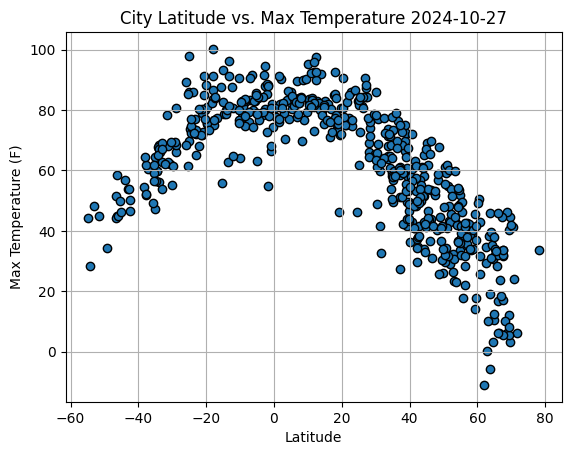

In [150]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor="black", linewidths=1, marker="o")

# Add labels and title
plt.title("City Latitude vs. Max Temperature 2024-10-27")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

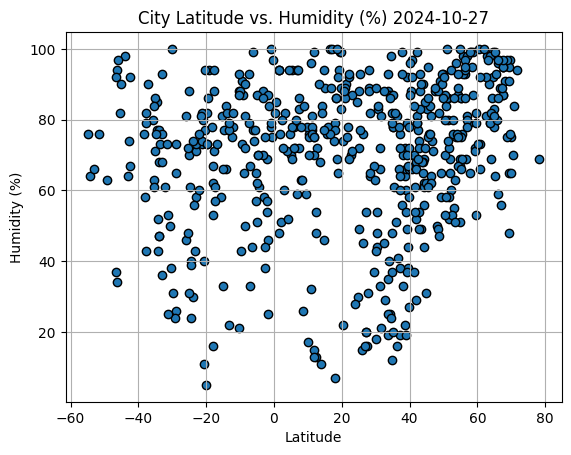

In [152]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black", linewidths=1, marker="o")

# Add labels and title
plt.title("City Latitude vs. Humidity (%) 2024-10-27")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

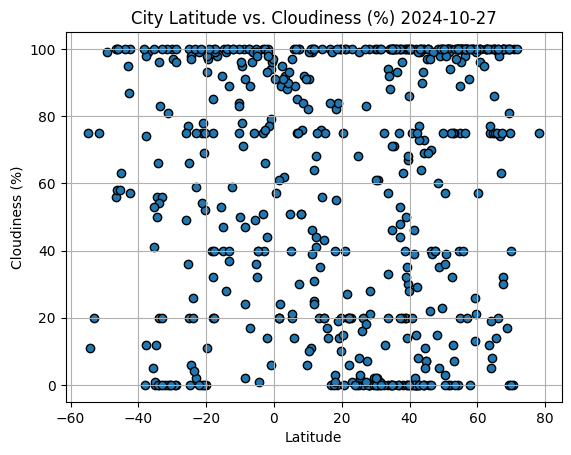

In [153]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o")

# Add labels and title
plt.title("City Latitude vs. Cloudiness (%) 2024-10-27")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

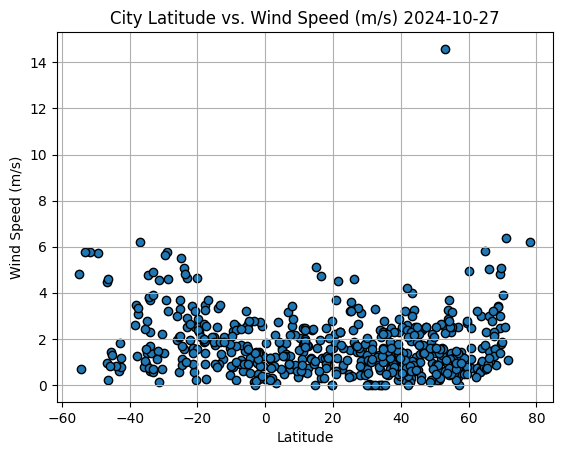

In [154]:
# Convert wind speed from mph to m/s (multiply by 0.447)
city_data_df['Wind Speed_m/s'] = city_data_df['Wind Speed'] * 0.447

# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed_m/s'], edgecolor="black", linewidths=1, marker="o")

# Add labels and title
plt.title("City Latitude vs. Wind Speed (m/s) 2024-10-27")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [138]:
import matplotlib.pyplot as plt
from scipy import stats

def linear_regression_plot(x_values, y_values, xlabel, ylabel, title):
  """
  Creates a scatter plot with a linear regression line.

  Args:
    x_values: A list or array of x-axis values.
    y_values: A list or array of y-axis values.
    xlabel: The label for the x-axis.
    ylabel: The label for the y-axis.
    title: The title of the plot.
  """

  # Calculate the regression line
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
  regress_values = x_values * slope + intercept

  # Create the scatter plot
  plt.scatter(x_values, y_values)

  # Plot the regression line
  plt.plot(x_values, regress_values, color='red')


  # Add labels and title
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

  # Show the plot
  plt.show()

In [156]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Wind Speed_m/s
City_ID,,,,,,,,,,
0,lepsy,46.2350,78.9456,53.636,64,70,3.09,KZ,1730031729,1.38123
1,vadso,70.0744,29.7487,41.162,75,40,8.75,NO,1730031730,3.91125
5,rayon,19.1444,-99.5836,46.274,94,14,2.59,MX,1730031734,1.15773
6,praia da vitoria,38.7333,-27.0667,66.452,72,100,2.24,PT,1730031736,1.00128
7,nogliki,51.8333,143.1667,29.030,69,0,2.33,RU,1730031737,1.04151


In [157]:
# Validate cities are present from started code result

filtered_df = northern_hemi_df[northern_hemi_df['City'].isin(['ginir', 'bam', 'marrakesh', 'machico'])]

# Display the filtered DataFrame
filtered_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Wind Speed_m/s
City_ID,,,,,,,,,,


Note: Some cities are missing from my results.  Code ran several times however resulats will remain as is so I dont breach API limits. 

In [141]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,53.726,64,95,1.34,AU,1730031731
3,adamstown,-25.0660,-130.1015,69.746,88,100,7.41,PN,1730031732
4,grytviken,-54.2811,-36.5092,28.526,64,11,1.57,GS,1730031733
9,edinburgh of the seven seas,-37.0676,-12.3116,60.638,90,99,13.89,SH,1730031739
11,port-aux-francais,-49.3500,70.2167,34.394,63,99,12.77,TF,1730031741


In [142]:
# Validate a sampling of cities from starter code IS present. 
filtered_df = southern_hemi_df[southern_hemi_df['City'].isin(['leava', 'waitangi', 'kerikeri', 'port lincoln'])]

# Display the filtered DataFrame
filtered_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
26,waitangi,-43.9535,-176.5597,56.822,98,100,1.79,NZ,1730031759
184,kerikeri,-35.2268,173.9474,47.408,86,1,2.03,NZ,1730031937
393,port lincoln,-34.7333,135.8667,56.570,76,12,6.18,AU,1730032177


###  Temperature vs. Latitude Linear Regression Plot

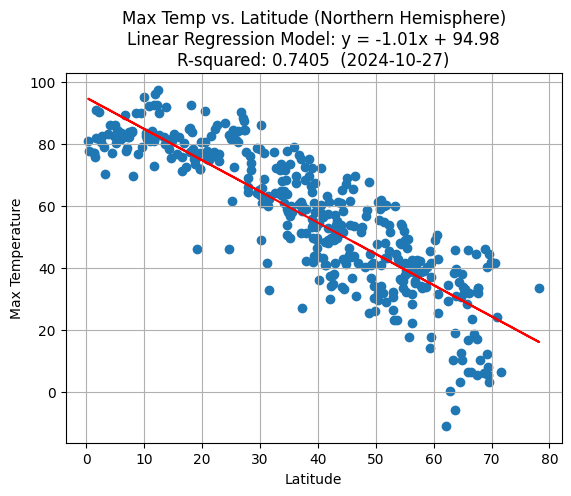

In [160]:
# Linear regression on Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Create a scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Max Temp vs. Latitude (Northern Hemisphere)\nLinear Regression Model: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {rvalue**2:.4f}  (2024-10-27)')

plt.grid(True)

# Show the plot
plt.show()

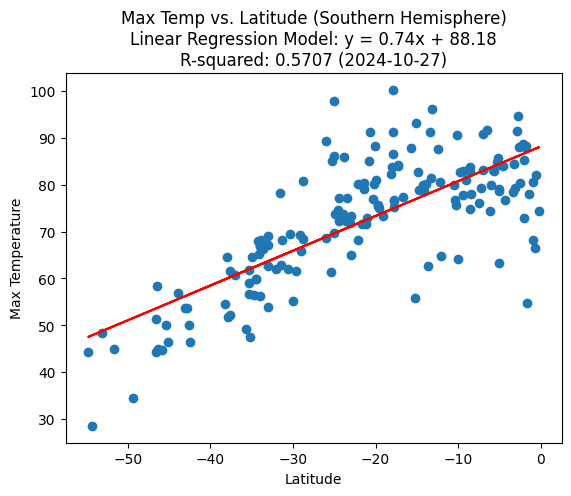

In [161]:
# Linear regression on Southern Hemisphere
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

regress_values = southern_hemi_df['Lat'] * slope + intercept

# Create a scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values,
 color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'Max Temp vs. Latitude (Southern Hemisphere)\nLinear Regression Model: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {rvalue**2:.4f} (2024-10-27)')

# Show the plot
plt.show()

**Discussion about the linear relationship:
 - Northern Hemisphere:
     Negative Correlation: As the latitude increases (moving north), the maximum temperature decreases. This is evident from the downward slope of the regression line.
     Moderate Correlation: The R-squared value of 0.7930 indicates a moderate to strong linear relationship between latitude and maximum temperature. This suggests that latitude is a significant factor in determining temperature in the Northern Hemisphere.

 - Southern Hemisphere:
   * Positive Correlation: As the latitude increases (moving south towards the equator), the maximum temperature generally increases. This is evident from the upward slope of the regression line.This is due to the proximity to the equator and the increasing intensity of solar radiation.
   * Moderate Correlation: The R-squared value of 0.4149 indicates a moderate positive linear relationship between latitude and maximum temperature. This suggests that latitude is a factor influencing temperature in the Southern Hemisphere, but other factors like ocean currents and wind patterns also play a significant role.
   * The lower R-squared value in the Southern Hemisphere compared to the Northern Hemisphere suggests that the relationship between latitude and temperature is less pronounced in the Southern Hemisphere. This coul be due to : dominance of water bodies, ocean currents, land distribution or as always the quality of the data or other limitations.  while the R-squared value suggests a weaker linear relationship in the Southern Hemisphere, there is still a discernible trend. The positive slope of the regression line indicates that, on average, temperature increases as you move towards the equator. However, other factors, such as ocean currents and atmospheric circulation, can influence this trend.

### Humidity vs. Latitude Linear Regression Plot

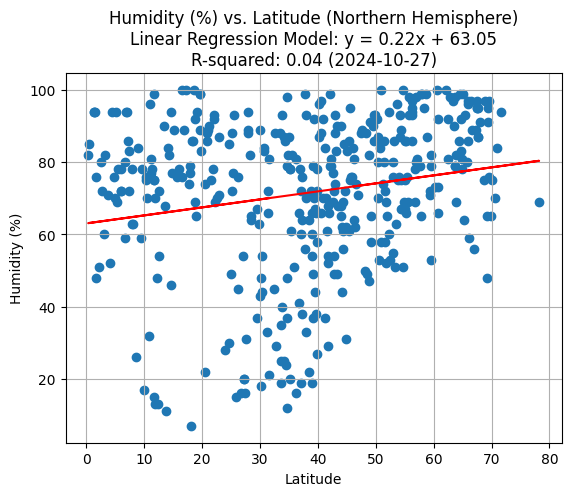

In [162]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept

# Create the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Humidity (%) vs. Latitude (Northern Hemisphere)\nLinear Regression Model: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {rvalue**2:.2f} (2024-10-27)')
plt.grid(True)

# Show the plot
plt.show()

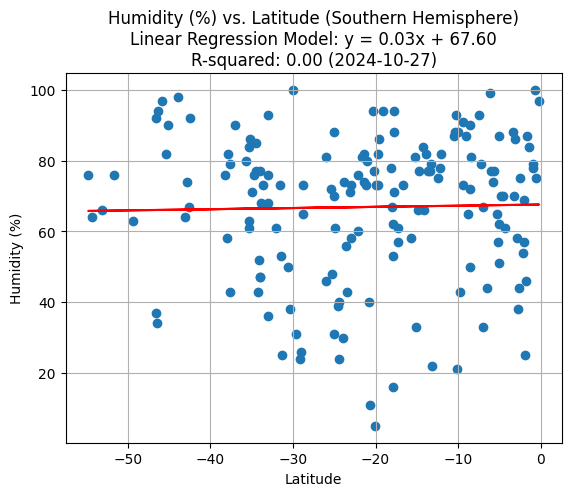

In [163]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

# Create the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Humidity (%) vs. Latitude (Southern Hemisphere)\nLinear Regression Model: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {rvalue**2:.2f} (2024-10-27)')
plt.grid(True)

# Show the plot
plt.show()

**Discussion about the linear relationship:
- Northern hemisphere 
    * Weak Correlation: The R-squared value of 0.04 indicates a very weak linear relationship between humidity and latitude in the Northern Hemisphere. This suggests that latitude is not a strong predictor of humidity in this region.
    * Scattered Data Points: The scatter plot shows a wide dispersion of data points, further supporting the idea that there's no clear linear trend.
    * Regression Line: The regression line is relatively flat, indicating a minimal change in humidity with changes in latitude.
- Southern Hemisphere
    * Weak Correlation: The R-squared value of 0.01 indicates a very weak linear relationship between humidity and latitude in the Southern Hemisphere.
    * Scattered Data Points: The scatter plot shows a wide dispersion of data points, further supporting the idea that there's no strong linear trend.
    * Flat Regression Line: The regression line is nearly horizontal, suggesting that changes in latitude have little impact on humidity levels in the Southern Hemisphere.
- Conclusion:
    * Both the Northern and Southern Hemispheres show a very weak relationship between humidity and latitude. This means that latitude doesn't significantly affect humidity levels.

    * The data points are scattered, and the regression lines are almost flat, indicating that other factors like local weather patterns, ocean currents, and atmospheric conditions have a greater influence on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

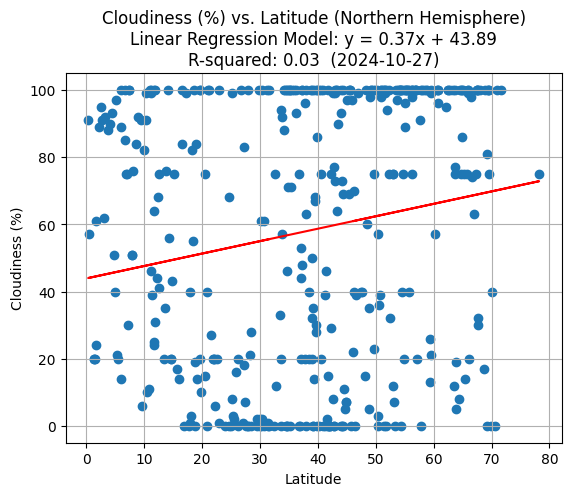

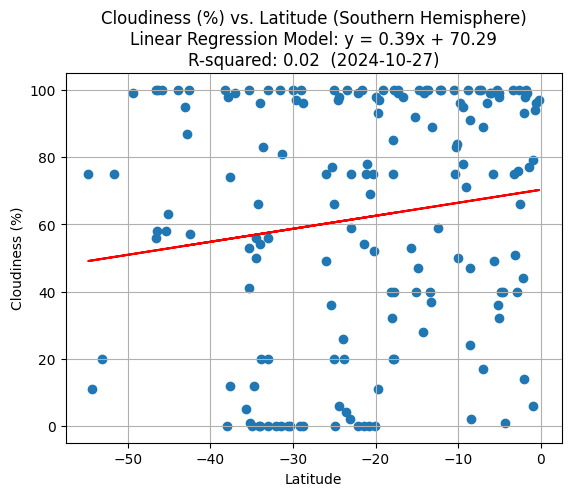

In [164]:
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

regress_values = northern_hemi_df['Lat'] * slope + intercept

# Create the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values,
 color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Cloudiness (%) vs. Latitude (Northern Hemisphere)\nLinear Regression Model: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {rvalue**2:.2f}  (2024-10-27)')
plt.grid(True)

plt.show()

# Southern Hemisphere

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

regress_values = southern_hemi_df['Lat'] * slope + intercept

# Create the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values,
 color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Cloudiness (%) vs. Latitude (Southern Hemisphere)\nLinear Regression Model: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {rvalue**2:.2f}  (2024-10-27)')
plt.grid(True)

plt.show()

**Discussion about the linear relationship:
- Northern Hemsphere
    * Weak Correlation: The R-squared value of 0.01 indicates a very weak linear relationship between cloudiness and latitude in the Northern Hemisphere.
    * Scattered Data Points: The scatter plot shows a wide dispersion of data points, further supporting the idea that there's no strong linear trend.
    * Gentle Upward Slope: The regression line has a slight positive slope, suggesting a very weak positive correlation. However, the low R-squared value indicates that this relationship is not statistically significant.
- Southern Hemsphere
    * Weak Correlation: The R-squared value of 0.03 indicates a very weak linear relationship between cloudiness and latitude in the Southern Hemisphere.
    * Scattered Data Points: The scatter plot shows a wide dispersion of data points, further supporting the idea that there's no strong linear trend. 
    * Gentle Upward Slope: The regression line has a slight positive slope, suggesting a very weak positive correlation. However, the low R-squared value indicates that this relationship is not statistically significant.
- Conclusion 
    * Both the Northern and Southern Hemispheres show a very weak relationship between cloudiness and latitude. This means that latitude doesn't have a significant impact on cloudiness. Other factors like local weather patterns, atmospheric conditions, and proximity to water bodies are more likely to influence cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

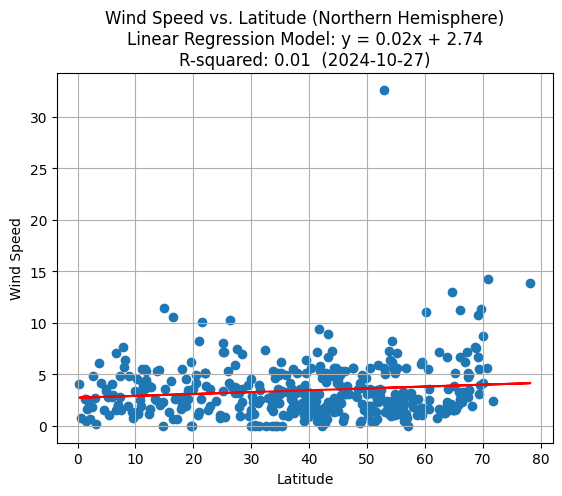

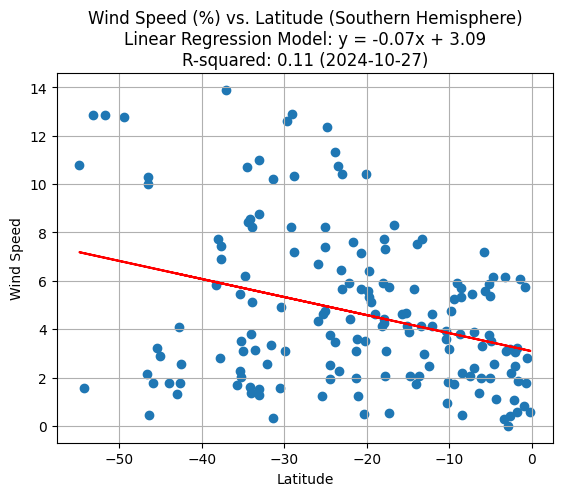

In [166]:
# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

regress_values = northern_hemi_df['Lat'] * slope + intercept

# Create the scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], regress_values,
 color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Wind Speed vs. Latitude (Northern Hemisphere)\nLinear Regression Model: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {rvalue**2:.2f}  (2024-10-27)')
plt.grid(True)

plt.show()

# Southern Hemisphere

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

regress_values = southern_hemi_df['Lat'] * slope + intercept

# Create the scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Plot the regression line
plt.plot(southern_hemi_df['Lat'], regress_values,
 color='red')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Wind Speed (%) vs. Latitude (Southern Hemisphere)\nLinear Regression Model: y = {slope:.2f}x + {intercept:.2f}\nR-squared: {rvalue**2:.2f} (2024-10-27)')
plt.grid(True)

plt.show()

**Discussion about the linear relationship:
- Northern Hempisphere
    * Weak Correlation: The R-squared value of 0.00 indicates a very weak linear relationship between wind speed and latitude in the Northern Hemisphere.
    * Scattered Data Points: The scatter plot shows a wide dispersion of data points, further supporting the idea that there's no strong linear trend.
    * Flat Regression Line: The regression line is nearly horizontal, suggesting that changes in latitude have little impact on wind speed.
- Southern Hemisphere
    * Weak Correlation: The R-squared value of 0.04 indicates a very weak linear relationship between wind speed and latitude in the Southern Hemisphere.
    * Scattered Data Points: The scatter plot shows a wide dispersion of data points, further supporting the idea that there's no strong linear trend.
    * Slight Negative Slope: The regression line has a slight negative slope, suggesting a very weak negative correlation. However, the low R-squared value indicates that this relationship is not statistically significant.
- Conslusion 
* Overall, for both hemispheres, there seems to be a weak correlation between wind speed and latitude. Other factors beyond latitude, such as local weather patterns and atmospheric conditions, likely have a stronger influence on wind speeds. Other factors, such as local weather patterns, atmospheric pressure gradients, and geographic features, likely play a more significant role in determining wind speeds.
